In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/online_retail.csv", encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536366,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:28,7.65,17850,United Kingdom
4,536366,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:28,4.25,17850,United Kingdom


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    51 non-null     int64  
 1   StockCode    51 non-null     str    
 2   Description  51 non-null     str    
 3   Quantity     51 non-null     int64  
 4   InvoiceDate  51 non-null     str    
 5   UnitPrice    51 non-null     float64
 6   CustomerID   51 non-null     int64  
 7   Country      51 non-null     str    
dtypes: float64(1), int64(3), str(4)
memory usage: 3.3 KB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [4]:
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


In [5]:
top_products = df['Description'].value_counts().head(10)
top_products


Description
KNITTED UNION FLAG HOT WATER BOTTLE    3
JAM MAKING SET WITH JARS               3
SET 7 BABUSHKA NESTING BOXES           2
RED WOOLLY HOTTIE WHITE HEART          2
LOVE BUILDING BLOCK WORD               2
ALARM CLOCK BAKELIKE PINK              2
ALARM CLOCK BAKELIKE RED               2
LUNCH BAG RED RETROSPOT                2
HOME BUILDING BLOCK WORD               2
PAPER CHAIN KIT 50'S CHRISTMAS         2
Name: count, dtype: int64

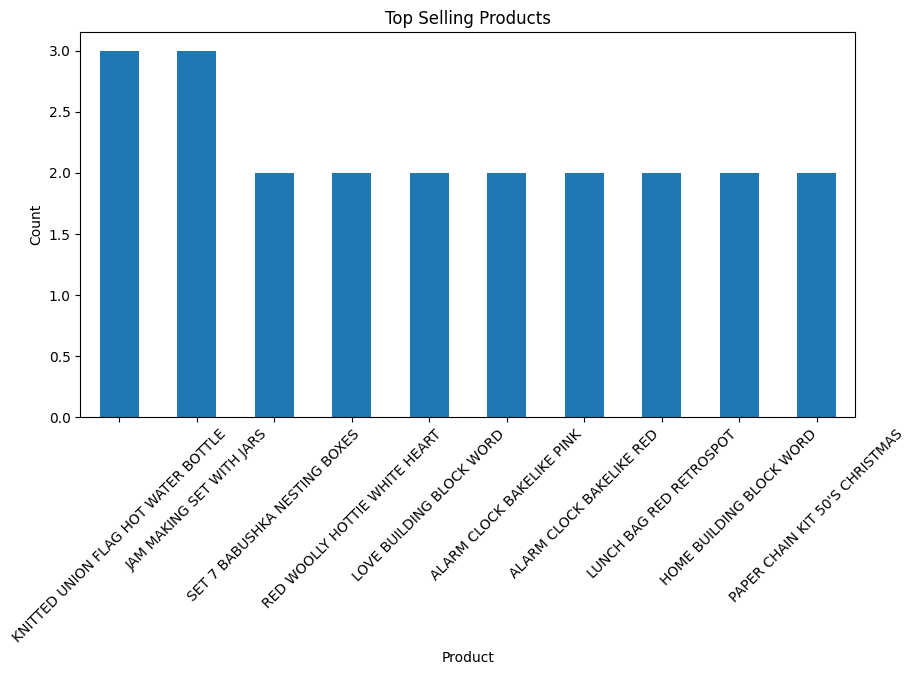

In [6]:
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
basket = (
    df.groupby(['InvoiceNo', 'Description'])['Quantity']
    .sum()
    .unstack()
    .fillna(0)
)


In [9]:
basket = basket.map(lambda x: 1 if x > 0 else 0)


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(
    basket,
    min_support=0.03,
    use_colnames=True
)
frequent_itemsets.head()


C:\Users\acer\AppData\Roaming\Python\Python314\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.038462,frozenset({AIRLINE BAG VINTAGE JET SET BROWN})
1,0.038462,frozenset({AIRLINE BAG VINTAGE WORLD CHAMPION})
2,0.038462,frozenset({ALARM CLOCK BAKELIKE GREEN})
3,0.038462,frozenset({ALARM CLOCK BAKELIKE IVORY})
4,0.076923,frozenset({ALARM CLOCK BAKELIKE PINK})


In [11]:
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1
)

rules.sort_values(by="lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,frozenset({AIRLINE BAG VINTAGE WORLD CHAMPION}),frozenset({AIRLINE BAG VINTAGE JET SET BROWN}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
1,frozenset({AIRLINE BAG VINTAGE JET SET BROWN}),frozenset({AIRLINE BAG VINTAGE WORLD CHAMPION}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
13,frozenset({WHITE HANGING HEART T-LIGHT HOLDER}),frozenset({CREAM CUPID HEARTS COAT HANGER}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
12,frozenset({CREAM CUPID HEARTS COAT HANGER}),frozenset({WHITE HANGING HEART T-LIGHT HOLDER}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
42,frozenset({LUNCH BAG BLACK SKULL}),frozenset({MINI PAINT SET VINTAGE}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
43,frozenset({MINI PAINT SET VINTAGE}),frozenset({LUNCH BAG BLACK SKULL}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
25,frozenset({HAND WARMER RED POLKA DOT}),frozenset({SET 2 TEA TOWELS I LOVE LONDON}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
24,frozenset({SET 2 TEA TOWELS I LOVE LONDON}),frozenset({HAND WARMER RED POLKA DOT}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
21,frozenset({GUMBALL COAT RACK}),frozenset({GIN + TONIC DIET METAL SIGN}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
20,frozenset({GIN + TONIC DIET METAL SIGN}),frozenset({GUMBALL COAT RACK}),0.038462,0.038462,0.038462,1.0,26.0,1.0,0.036982,inf,1.0,1.0,1.0,1.0
